# <center style="color: #008080; font-size: 52px; font-weight: bold;">Movie Recommendations</center>

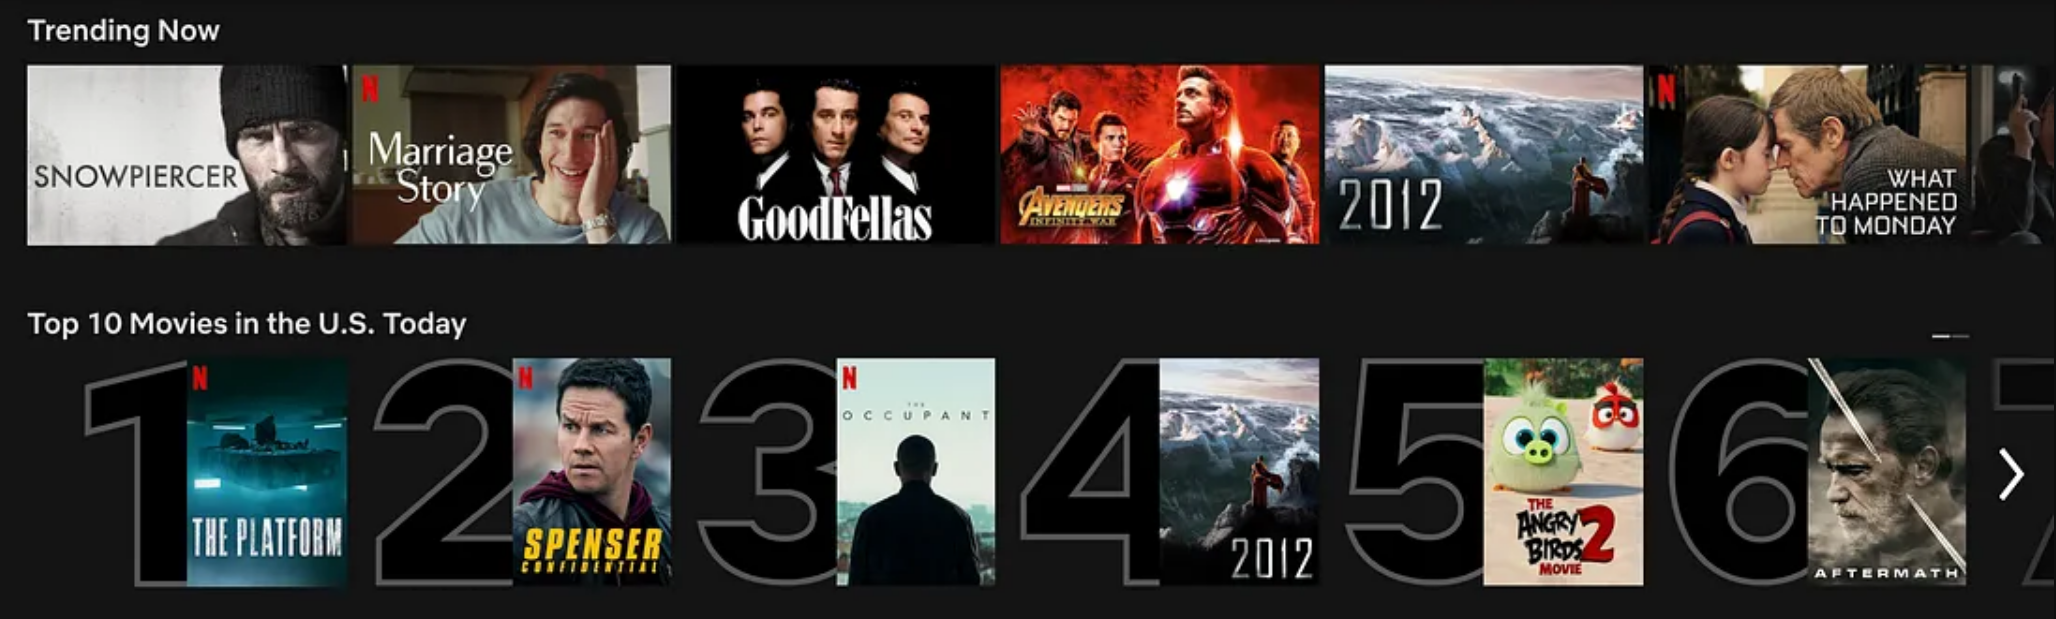

## Introduction: Content-based Recommendations
In the realm of machine learning, recommendation systems play a pivotal role in suggesting products like books and movies based on user preferences. Content-based recommendation systems rely heavily on techniques like cosine similarity to measure the likeness between items. To facilitate the creation of such models, libraries like Scikit-learn offer tools such as the cosine_similarity function. Let's delve into constructing a model capable of taking a movie title as input and furnishing a roster of similar movies.

## Handling the data

Start by loading a database of 4,800 movies that includes information such as the director, the cast, and the genre of each movie, as well as keywords describing the movie. Then use Scikit's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class to tokenize and vectorize the information, and Scikit's [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function to generate a similarity matrix.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('movies.csv')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


Remove all of the columns except the ones that will be used to quantify similarities between movies.

In [3]:
df = df[['title', 'genres', 'keywords', 'cast', 'director']]
df = df.fillna('') # Fill missing values with empty strings
df.head()

,title,genres,keywords,cast,director
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


Add a new column named "features" to the DataFrame that combines all of the words in the other columns.

In [4]:
df['features'] = df['title'] + ' ' + df['genres'] + ' ' + df['keywords'] + ' ' + df['cast'] + ' ' + df['director']

In [5]:
df['features']

0       Avatar Action Adventure Fantasy Science Fictio...
1       Pirates of the Caribbean: At World's End Adven...
2       Spectre Action Adventure Crime spy based on no...
3       The Dark Knight Rises Action Crime Drama Thril...
4       John Carter Action Adventure Science Fiction b...
                              ...                        
4798    El Mariachi Action Crime Thriller united state...
4799    Newlyweds Comedy Romance  Edward Burns Kerry B...
4800    Signed, Sealed, Delivered Comedy Drama Romance...
4801    Shanghai Calling   Daniel Henney Eliza Coupe B...
4802    My Date with Drew Documentary obsession camcor...
Name: features, Length: 4803, dtype: object

#### Tokenize and vectorize: text in the DataFrame's "features" column.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', min_df=20)
word_matrix = vectorizer.fit_transform(df['features'])
word_matrix.shape

(4803, 918)

#### Cosine similarities for all the vector pairs.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(word_matrix)

## Generate movie recommendations

Function that takes a movie title as input and returns a list of similar movies, and then use that function to make some recommendations.

In [8]:
def get_recommendations(title, df, sim, count=10):
    # Get the row index of the specified title in the DataFrame
    index = df.index[df['title'].str.lower() == title.lower()]
    
    # Return an empty list if there is no entry for the specified title
    if (len(index) == 0):
        return []

    # Get the corresponding row in the similarity matrix
    similarities = list(enumerate(sim[index[0]]))
    
    # Sort the similarity scores in that row in descending order
    recommendations = sorted(similarities, key=lambda x: x[1], reverse=True)
    
    # Get the top n recommendations, ignoring the first entry in the list since
    # it corresponds to the title itself (and thus has a similarity of 1.0)
    top_recs = recommendations[1:count + 1]

    # Generate a list of titles from the indexes in top_recs
    titles = []

    for i in range(len(top_recs)):
        title = df.iloc[top_recs[i][0]]['title']
        titles.append(title)

    return titles

### Example-1 

In [9]:
get_recommendations('Skyfall', df, sim)

['Spectre',
 'Quantum of Solace',
 'Johnny English Reborn',
 'Clash of the Titans',
 'Die Another Day',
 'Diamonds Are Forever',
 'Wrath of the Titans',
 'I Spy',
 'Sanctum',
 'Blackthorn']

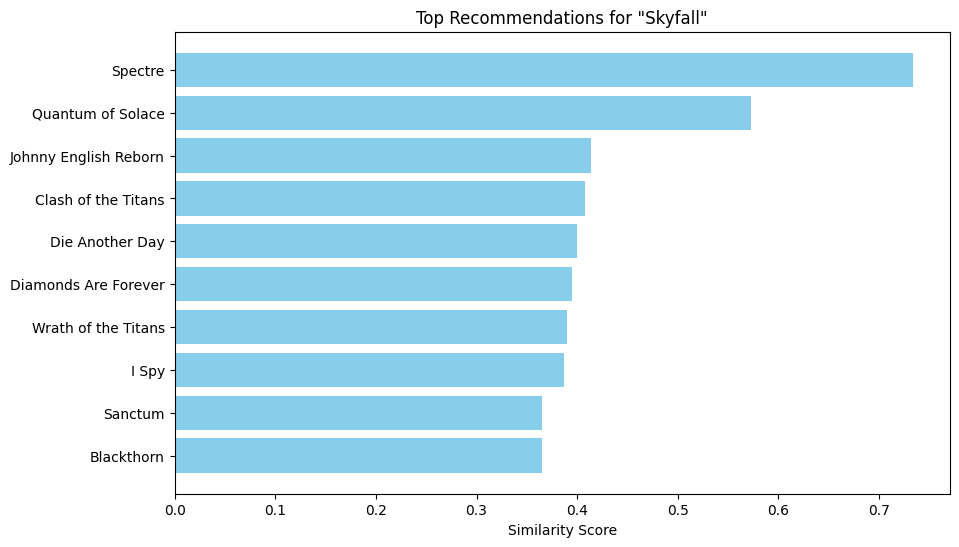

In [24]:
def plot_recommendations(movie_title, df, sim):
    recommendations = get_recommendations(movie_title, df, sim)
    similarity_scores = [sim[df.index[df['title'].str.lower() == title.lower()][0], df.index[df['title'].str.lower() == movie_title.lower()][0]] for title in recommendations]

    plt.figure(figsize=(10, 6))
    plt.barh(recommendations, similarity_scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title(f'Top Recommendations for "{movie_title}"')
    plt.gca().invert_yaxis()
    plt.show()

plot_recommendations('Skyfall', df, sim)

### Example-2

In [10]:
get_recommendations('Mulan', df, sim)

['Shrek',
 'Frozen',
 '1911',
 'Kung Fu Panda',
 'Shrek the Third',
 'The Polar Express',
 'Tangled',
 'Shrek Forever After',
 'Shrek 2',
 'Jungle Shuffle']

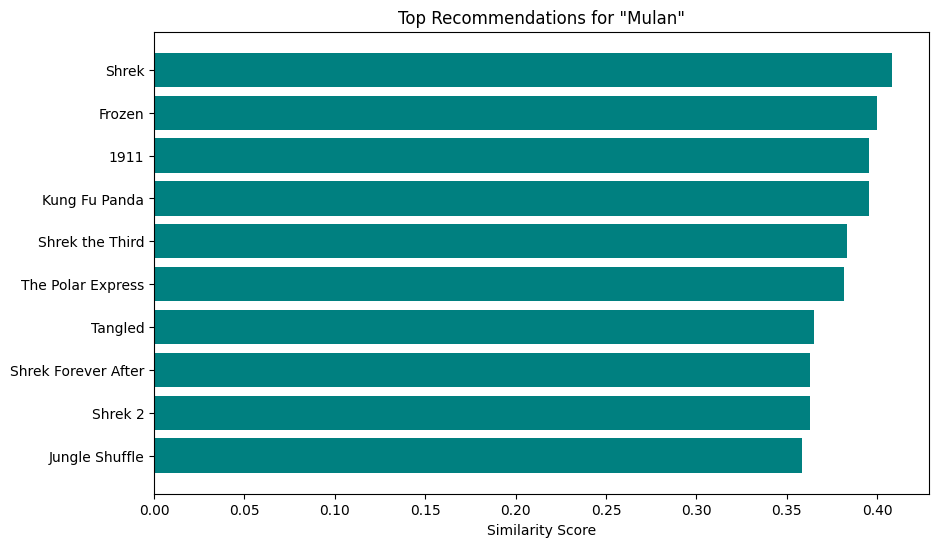

In [32]:
def plot_recommendations(movie_title, df, sim):
    recommendations = get_recommendations(movie_title, df, sim)
    similarity_scores = [sim[df.index[df['title'].str.lower() == title.lower()][0], df.index[df['title'].str.lower() == movie_title.lower()][0]] for title in recommendations]

    plt.figure(figsize=(10, 6))
    plt.barh(recommendations, similarity_scores, color='teal')
    plt.xlabel('Similarity Score')
    plt.title(f'Top Recommendations for "{movie_title}"')
    plt.gca().invert_yaxis()
    plt.show()

plot_recommendations('Mulan', df, sim)

### Example-3

In [28]:
get_recommendations('Die Hard', df, sim)

['Die Hard 2',
 'The Prince',
 'Sphinx',
 'Die Hard: With a Vengeance',
 '13 Hours: The Secret Soldiers of Benghazi',
 'Act of Valor',
 'Live Free or Die Hard',
 'A Good Day to Die Hard',
 'Broken Arrow',
 'Surrogates']

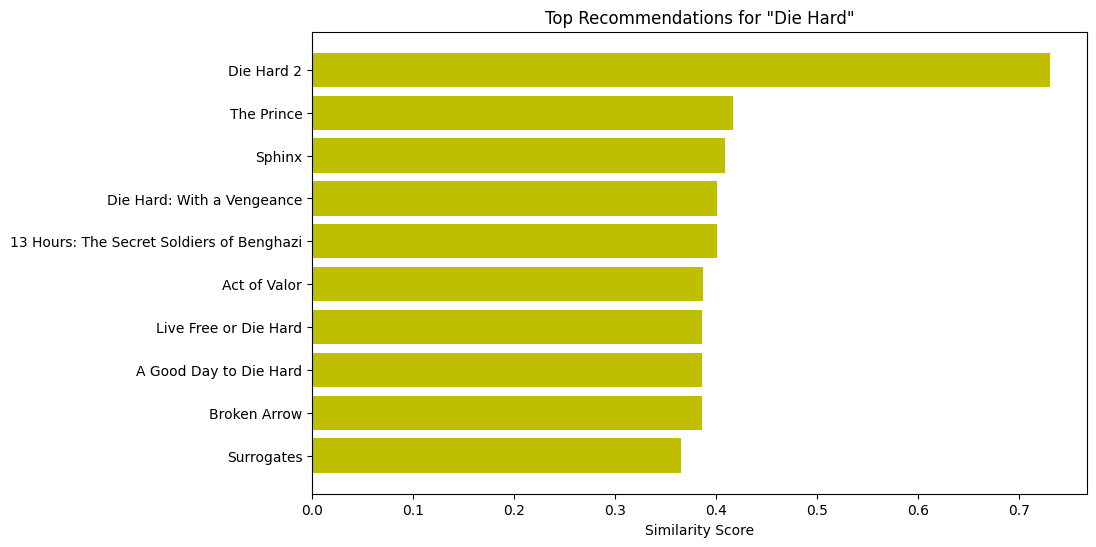

In [31]:
def plot_recommendations(movie_title, df, sim):
    recommendations = get_recommendations(movie_title, df, sim)
    similarity_scores = [sim[df.index[df['title'].str.lower() == title.lower()][0], df.index[df['title'].str.lower() == movie_title.lower()][0]] for title in recommendations]

    plt.figure(figsize=(10, 6))
    plt.barh(recommendations, similarity_scores, color='y')
    plt.xlabel('Similarity Score')
    plt.title(f'Top Recommendations for "{movie_title}"')
    plt.gca().invert_yaxis()
    plt.show()

plot_recommendations('Die Hard', df, sim)